<a href="https://colab.research.google.com/github/zyxCA/Telecom-Churn-Analysis-Portfolio-Project-/blob/main/chrun_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
# Replace 'churn_ml_data.csv' with the actual path to your file if it's not in the same directory as your notebook.
data = pd.read_csv('/content/churn_ml_vw copy.csv')

# Now you can work with the data in the 'data' DataFrame.
# For example, you can display the first few rows:
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11340-JAM,Female,21,No,Jammu & Kashmir,8,7,NaN,Yes,No,...,Bank Withdrawal,19.95,219.50,0.0,0,78.60,298.10,Stayed,Others,Others
1,11348-MAH,Female,46,No,Maharashtra,11,19,Deal 3,Yes,No,...,Bank Withdrawal,56.05,1522.65,0.0,110,1235.08,2867.73,Stayed,Others,Others
2,11359-AND,Female,28,Yes,Andhra Pradesh,3,6,Deal 4,Yes,No,...,Credit Card,20.50,290.55,0.0,0,435.84,726.39,Stayed,Others,Others
3,11370-TAM,Female,21,No,Tamil Nadu,15,10,Deal 4,Yes,No,...,Credit Card,59.10,772.85,0.0,0,476.14,1248.99,Stayed,Others,Others
4,11392-JAM,Female,39,Yes,Jammu & Kashmir,11,1,Deal 2,Yes,No,...,Bank Withdrawal,84.40,4484.05,0.0,0,1655.64,6139.69,Stayed,Others,Others


In [69]:

data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason','Phone_Service','Unlimited_Data','Total_Refunds','Streaming_TV', 'Streaming_Movies',
    'Streaming_Music'], axis=1)
# List of columns to be label encoded
columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]
# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 定义参数范围
param_grid = {'n_estimators': list(range(1, 101))}

# 初始化模型（这里不直接指定 n_estimators，因为 GridSearchCV 会传入不同的值）
rf_model = RandomForestClassifier(random_state=42)

# 设置 GridSearchCV, cv=5 表示使用5折交叉验证, scoring='accuracy' 使用准确率作为评估指标
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# 在训练集上进行网格搜索
grid_search.fit(X_train, y_train)

# 输出最优参数和对应的评分
print("最佳参数：", grid_search.best_params_)
print("最佳交叉验证得分：", grid_search.best_score_)


最佳参数： {'n_estimators': 96}
最佳交叉验证得分： 0.8503642039542143


In [75]:
#Train Random Forest Model
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix:
[[830  43]
 [114 215]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       873
           1       0.83      0.65      0.73       329

    accuracy                           0.87      1202
   macro avg       0.86      0.80      0.82      1202
weighted avg       0.87      0.87      0.86      1202



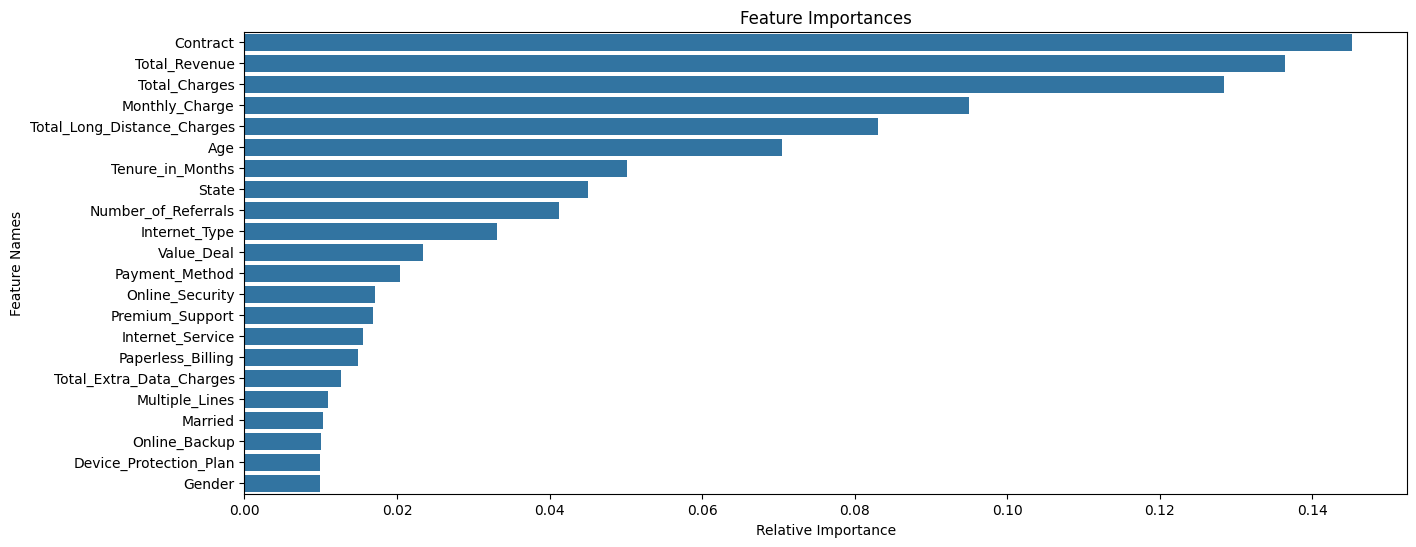

In [76]:
#Evaluate Model
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [78]:
#Use Model for Prediction on New Data
# Define the path to the Joiner Data Excel file
new_data = pd.read_csv('/content/churn_ml_test.csv')

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Customer_ID', 'Customer_Status','Churn_Category', 'Churn_Reason','Phone_Service','Unlimited_Data','Total_Refunds','Streaming_TV', 'Streaming_Movies',
    'Streaming_Music'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"C:\yourpath\Predictions.csv", index=False)

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   16733-ODI  Female   76     Yes       Odisha                   10   
1   16764-WES    Male   40      No  West Bengal                   15   
2   16931-BIH  Female   39     Yes        Bihar                    8   
3   26902-TEL    Male   52     Yes    Telangana                    7   
4   29371-WES  Female   23      No  West Bengal                   14   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 1        NaN           Yes             No  ...   
1                13     Deal 5           Yes             No  ...   
2                23     Deal 5           Yes             No  ...   
3                 2        NaN           Yes             No  ...   
4                 9     Deal 5           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0      Credit Card          45.85         45.85           0.0   
1      Credit Card          